# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [5]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [6]:
#loading the data in dataframe.
df = pd.read_csv("stock_data.csv")

In [7]:
# copying data to avoid any changes to original data
data = df.copy()

## Data Overview

- Observations
- Sanity checks

### View the first and last 5 rows of the dataset.

In [8]:
# load top 5 rows to check data is loaded successfully.
data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [9]:
#load last 5 rows to check file is loaded successfully.
data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


* The dataset is loaded properly and contains information about Stock price and financial indicators for few stocks listed in New York Stock Exchange.

### Understanding the shape of the dataset.

In [10]:
# The shape method gives the number of rows and columns in the data frame.
data.shape

(340, 15)

* There are 340 rows and 15 columns in the data set.

### Checking the data types of the columns for the dataset

In [11]:
# returns the concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are  11 numerical columns and 4 categorical columns.
- There are no missing values in the dataset.

### Checking for duplicate values

In [12]:
data.duplicated().sum()

0

- There are no duplicate values in the data set.
- Each Ticker symbol is unique.

### Checking for missing values

In [13]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There are no missing values in the dataset.

### Ticker Symbol is an unique id assigned to each transaction. As the column is of no significane we will drop it from the dataframe.

In [14]:
data.drop(['Ticker Symbol'],axis = 1, inplace= True, )

In [15]:
#recheck if column dropped successfully.
data.shape

(340, 14)

### Checking the statistical summary of data.

In [16]:
#returns the statistical summary
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327936,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


- There are 340 securities listed from different sectors.
- The Current Price ranges from 4.5 to ~1275 for different stocks with an average price of 80 dollars.
- The Average Price change from past 13 weeks is approx 4 dollars.
- The volatality of market has shown a mean change of 1.5
- The Average Net Income of companies listed is 1.4 billions.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [17]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [18]:
# function to create labeled barplots

def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Current Price

**1. What does the distribution of stock prices look like?**

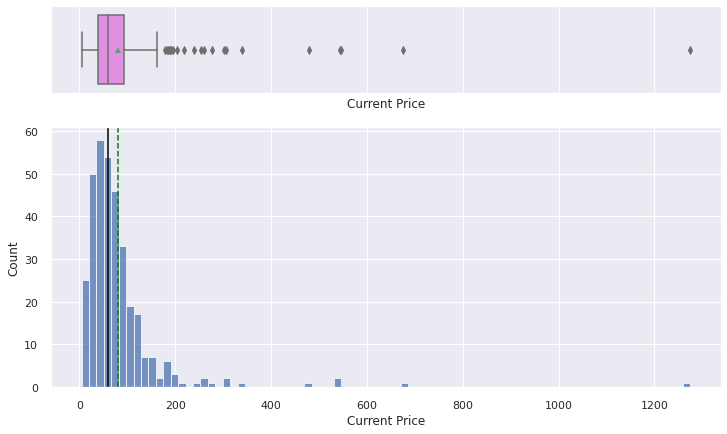

In [19]:
histogram_boxplot(data, 'Current Price')

* The distribution is heavily right skewed.
- There are few outliers having price above 200 dollars.

### Price Change

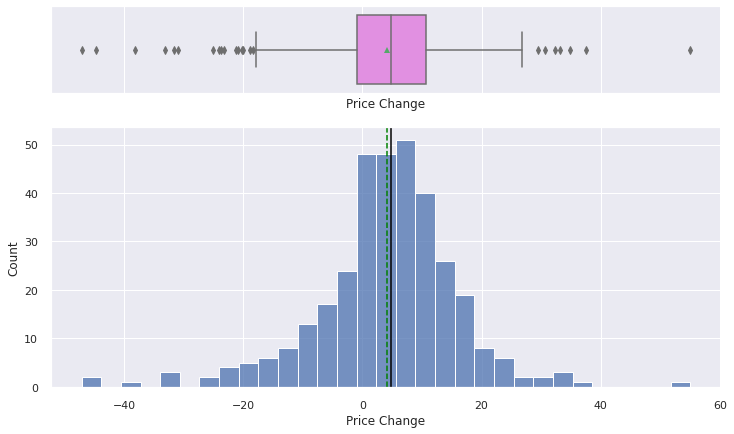

In [20]:
histogram_boxplot(data, 'Price Change')

- The change in price shows normal distribution, with outliers on both sides.
- The stock prices have declined for many campanies as more outliers are seen in the lower tail.
- Few stocks have also shown an increase in the price.

### Volatility

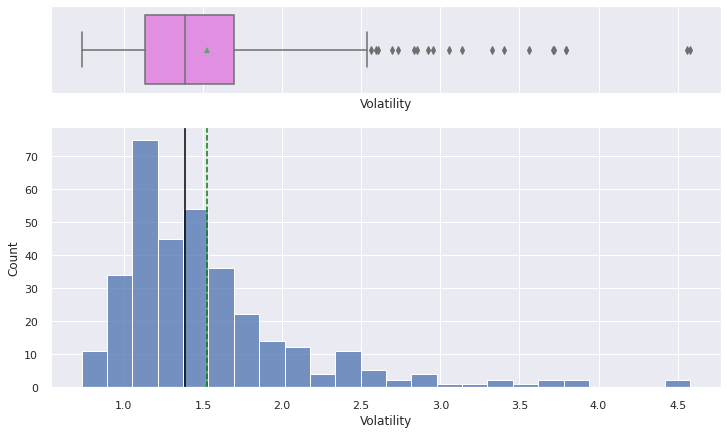

In [21]:
histogram_boxplot(data, 'Volatility')

- The Volatality is heavily Right Skewed.

### ROE

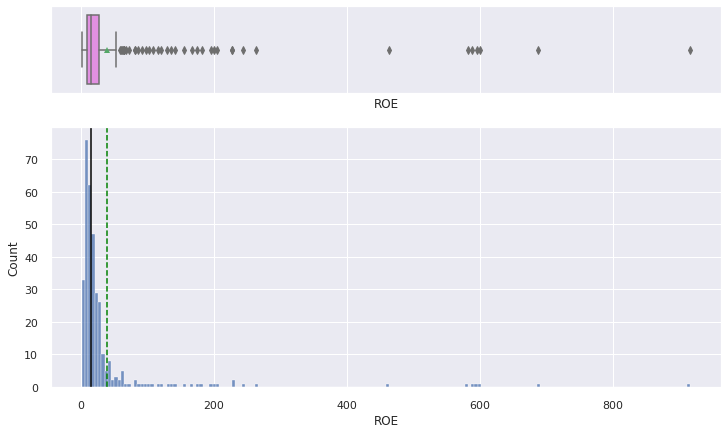

In [22]:
histogram_boxplot(data, 'ROE')

- The ROE distribution is heavily right skewed with many ouliers.
- Very few companies have an ROE of more than 50.

### Cash Ratio

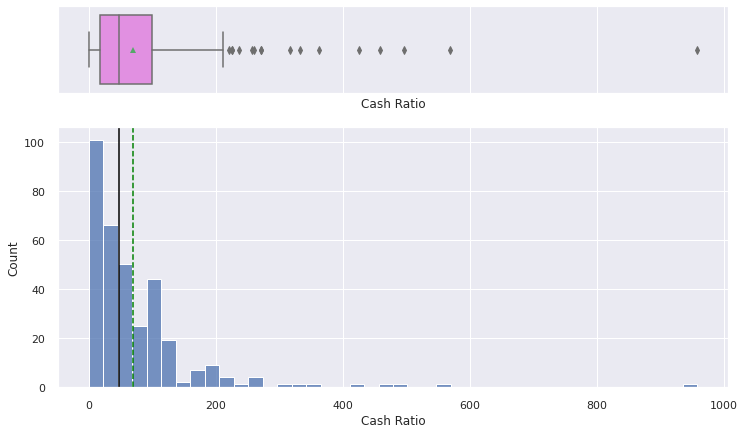

In [23]:
histogram_boxplot(data, 'Cash Ratio')

- The Cash ratio distirbution is highly right skewed.
- Average Cash ratio is 70 percent.

### Net Cash Flow

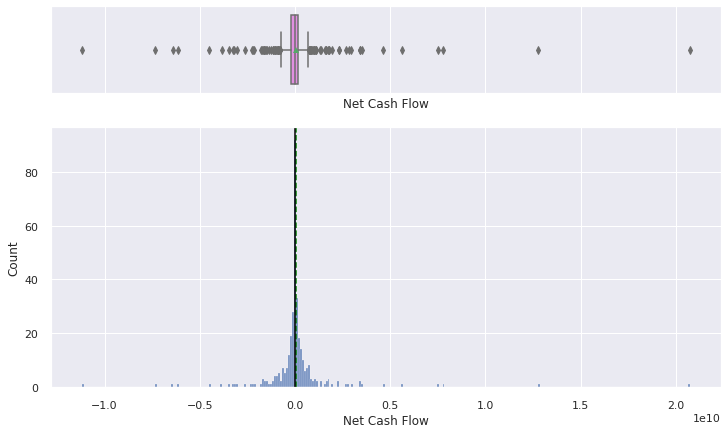

In [24]:
histogram_boxplot(data, 'Net Cash Flow')

- The Net Cash Flow shows Normal Distribution with many outliers on both sides.

### Net Income

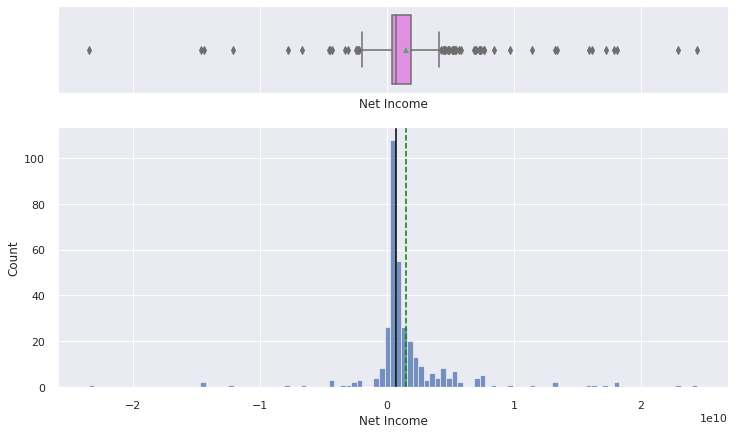

In [25]:
histogram_boxplot(data, 'Net Income')

- The Net Income distribution is close to Normal.

### Earnings Per Share

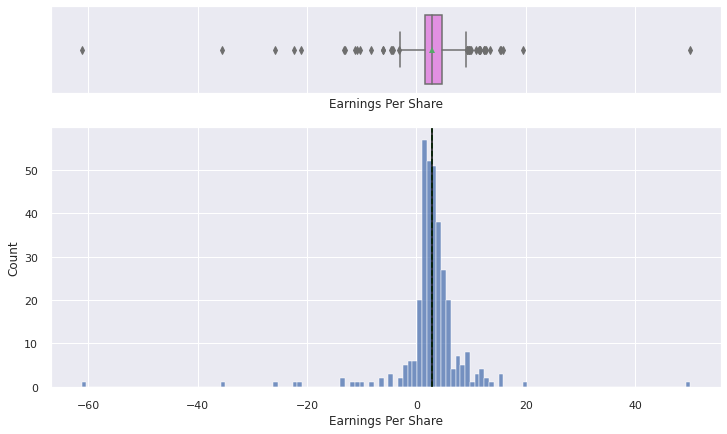

In [26]:
 histogram_boxplot(data, 'Earnings Per Share')

- Earnings Per Share shows Normal distribution. 
- There are many outliers on both sides.

### Estimated Shares Outstanding

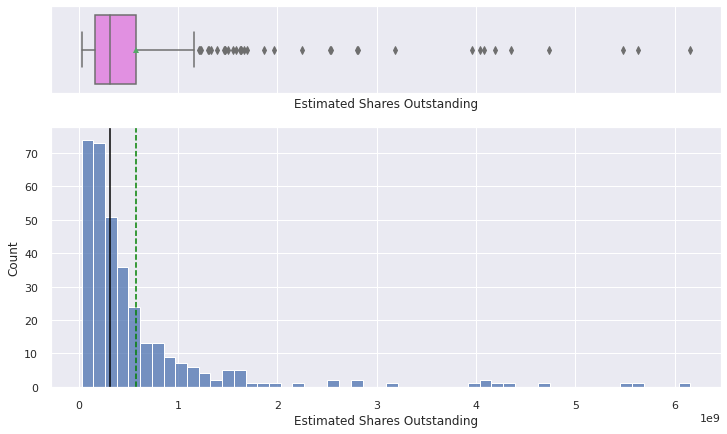

In [27]:
histogram_boxplot(data, 'Estimated Shares Outstanding')

- Estimated Shares Outstanding is heavily Right Skewed.

### P/E Ratio

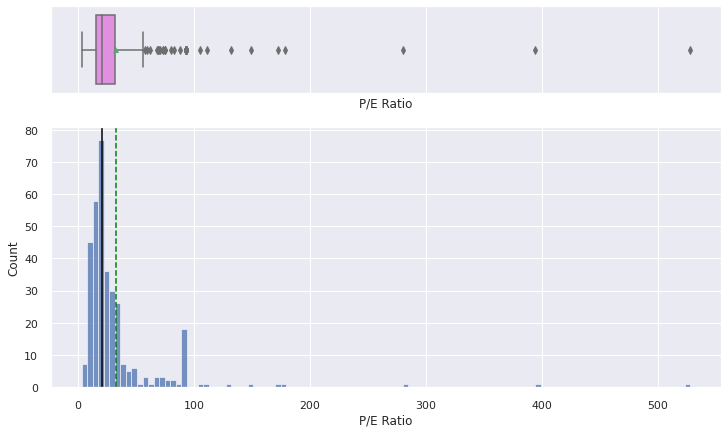

In [28]:
histogram_boxplot(data, 'P/E Ratio')

- The P/E Ratio distribution is highly Right Skewed.
- Few companies has P/E Ratio greater than 100.

### P/B Ratio

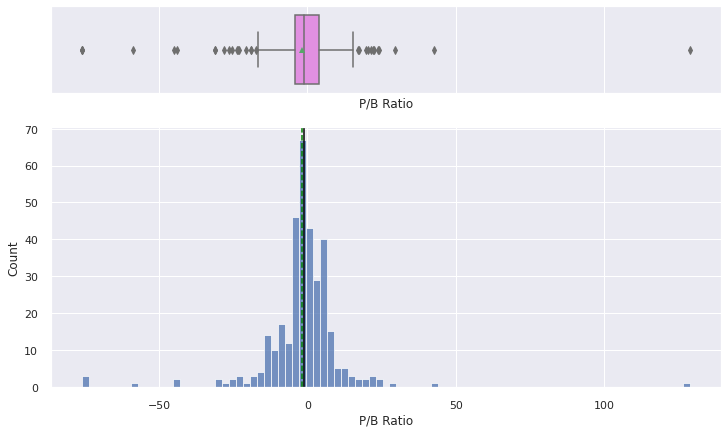

In [29]:
histogram_boxplot(data, 'P/B Ratio')

- The P/B Ratio shows Normal distribution, with outliers on both tails.

### GICS Sector

In [30]:
#display the sectors number of stocks
df["GICS Sector"].value_counts()

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

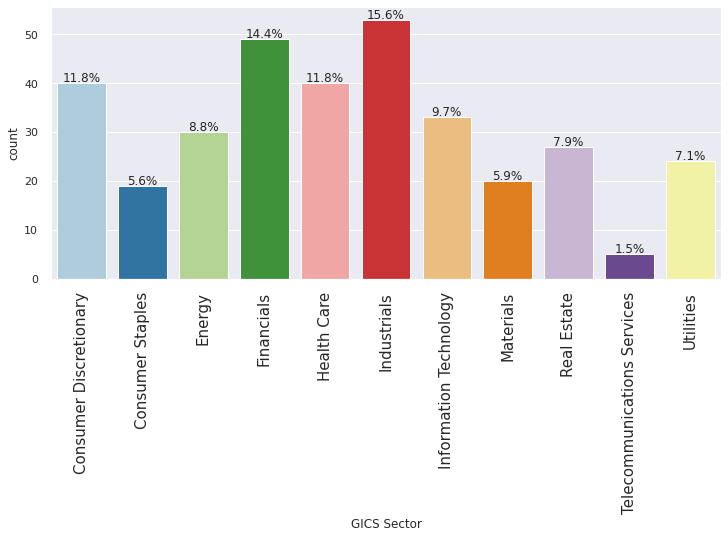

In [31]:
labeled_barplot(data, 'GICS Sector', perc = True)

- Industrial Sector has the most number of companies listed.
- Only 1.5% of the companies listed belongs to Telecommunication Sector.
- The top 4 sectors namely, *Industrials*, *Financials*, *HealthCare*, *Consumer* *Discretionary* comprises more than 50% of the stocks.

### GICS Sub Industry

In [32]:
df['GICS Sub Industry'].nunique()

104

In [33]:
#display the top ten sub industries with the most number of stocks
df['GICS Sub Industry'].value_counts().head(10)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Health Care Equipment                 11
MultiUtilities                        11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: GICS Sub Industry, dtype: int64

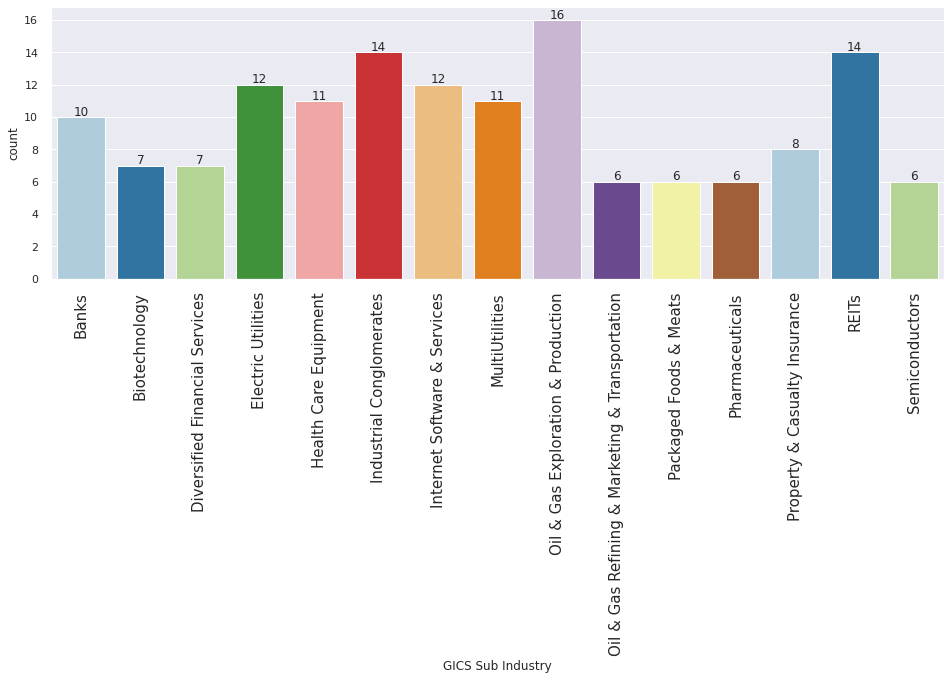

In [34]:
labeled_barplot(data, 'GICS Sub Industry', n = 15)

- There are stocks listed from 104 sub industries.
- 16 stocks are listed from *Oil & Gas Exploration & Production* sub industry making it the largest numbers of stocks.

### Bivariate Analysis

#### **How are the different variables correlated with each other?**

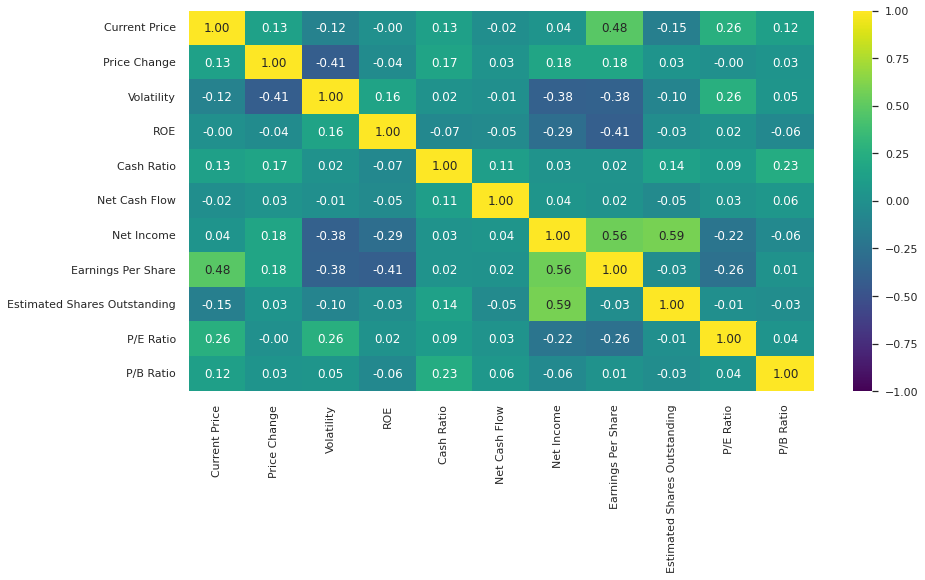

In [35]:
#create correlation heat map for numerical variables
plt.figure(figsize=(14, 7))
sns.heatmap(
    data.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap='viridis'
)
plt.show()

- There is significant correlation between *Estimated Shares Outstanding* and *Net Income*.
- There is positive correlation between *Earnings Per Share* and Net Income.
- Earnings per share and Current Price are Positively correlated.
- There is also Negative correlation between Volatility and Price Change.

#### **The stocks of which economic sector have seen the maximum price increase on average?**

In [36]:
data.groupby(['GICS Sector']).mean()['Price Change']

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

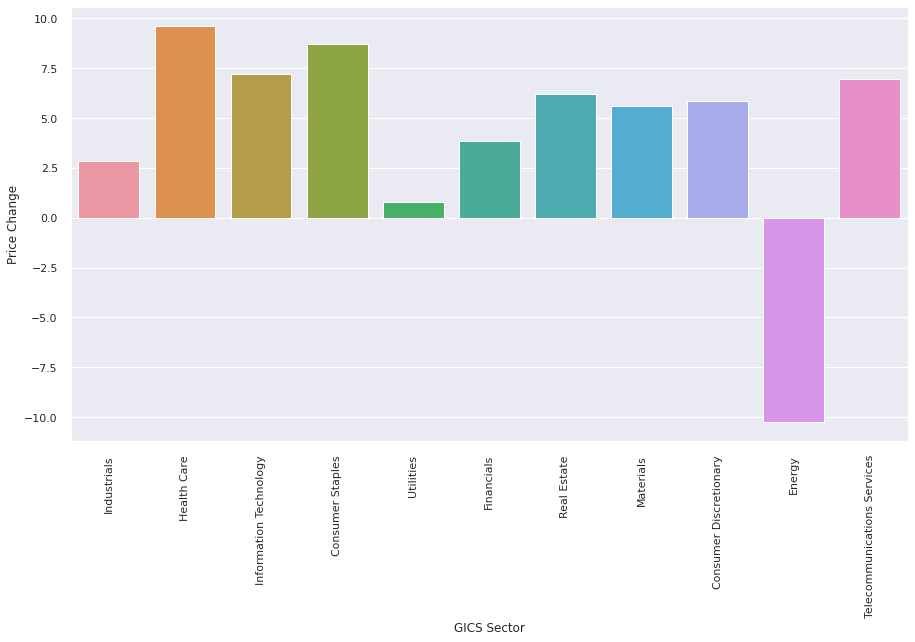

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='GICS Sector', y='Price Change', ci=False) 
plt.xticks(rotation=90)
plt.show()

- **Health Care** sector shows approx 10 % increase in Average price which is maximum.


#### **Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

In [38]:
df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

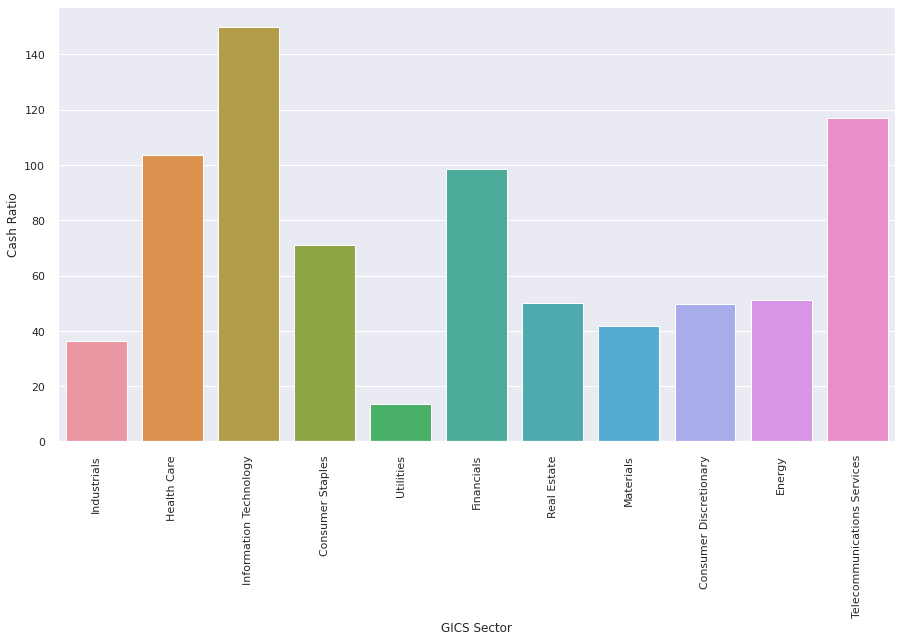

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

- The maximum average cash ratio under economic sectors equals 149.82 and belongs to the **Information Technology** sector.
- The second largest sector with average high cash ratio is *Telecommunications Services* followed by *Health Care*.
- *Utilities* sector has the least mean cash ratio.

#### **P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

In [40]:
df.groupby('GICS Sector')['P/E Ratio'].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

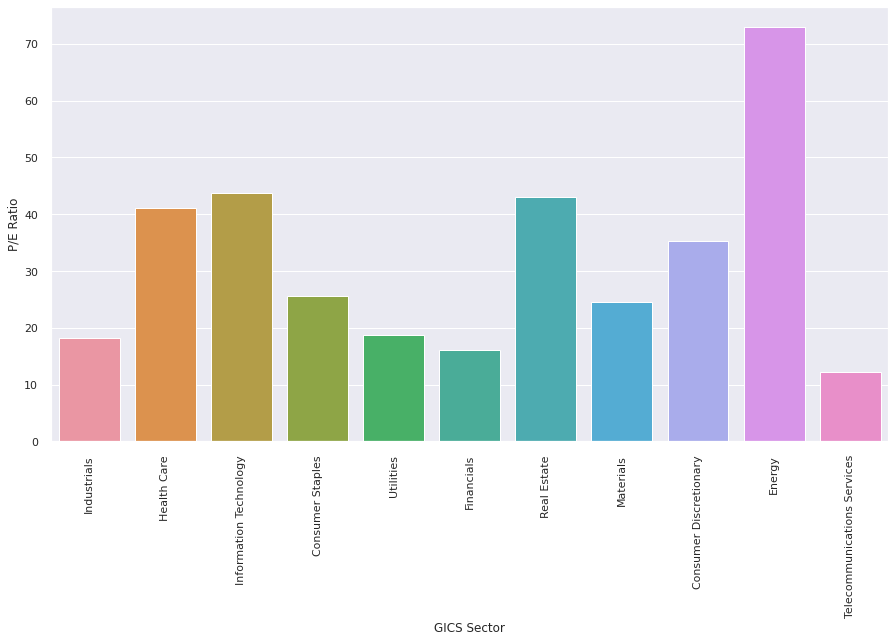

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

- **Energy** sector has the highest mean P/E Ratio of 72%.
- *Telecommunications Services* has the lowest mean P/E Ratio.

#### **Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

In [42]:
df.groupby('GICS Sector')['Volatility'].mean().sort_values(ascending=False)

GICS Sector
Energy                         2.568777
Materials                      1.816726
Information Technology         1.659801
Consumer Discretionary         1.595478
Health Care                    1.541023
Industrials                    1.416989
Telecommunications Services    1.341612
Financials                     1.267255
Real Estate                    1.206053
Consumer Staples               1.152675
Utilities                      1.118018
Name: Volatility, dtype: float64

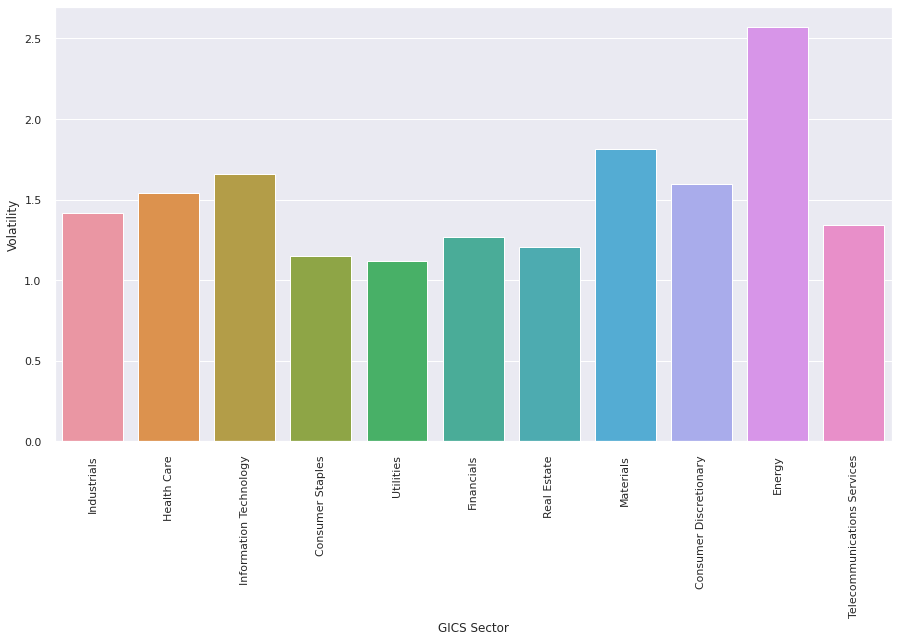

In [43]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

- Stocks from the **Energy** sector are **highly** volatile making it riskier investement.
- Utilities sector stocks has lowest risk.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

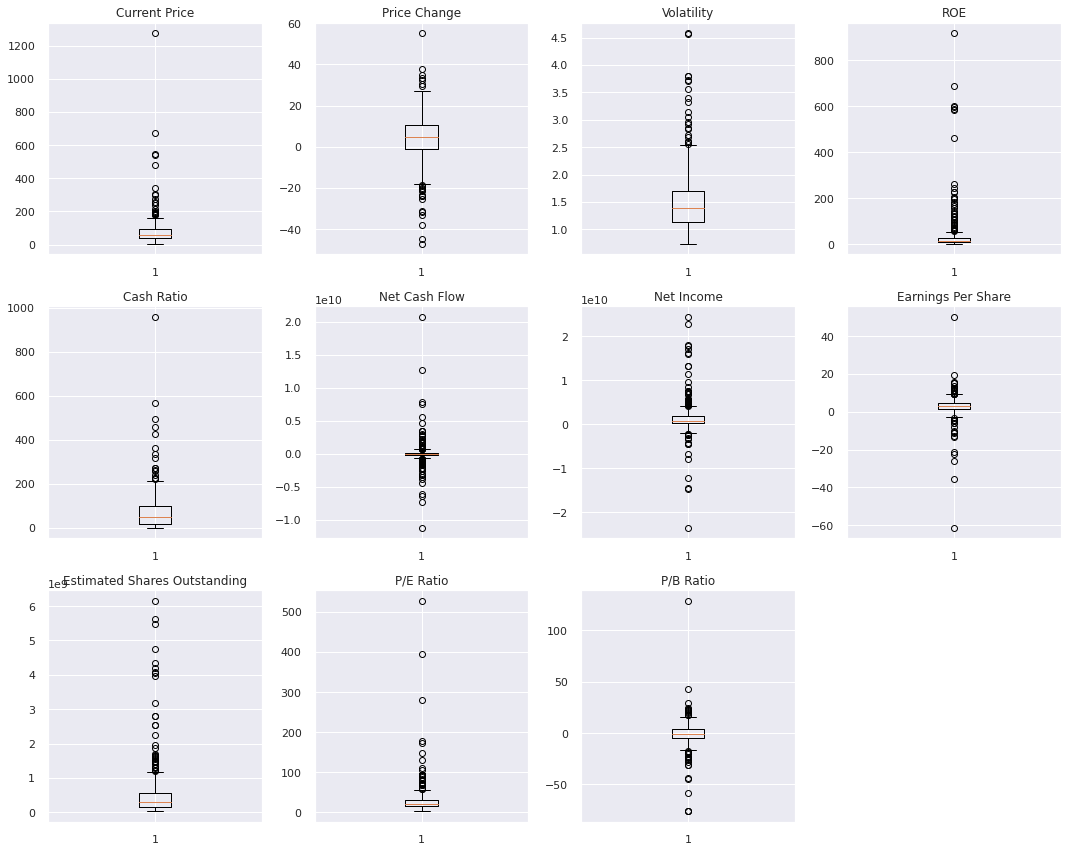

In [44]:
plt.figure(figsize=(15, 12))
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- There are quite a number of outliers in the dataset.
- As all these are proper values we will not be treating them.

### Scaling

- Let's scale the data before we proceed with clustering.

In [45]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data[numeric_columns].copy() 
subset_scaled = scaler.fit_transform(subset)

In [46]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [47]:
#display top 5 rows of the scaled data
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## EDA

- It is a good idea to explore the data once again after manipulating it.

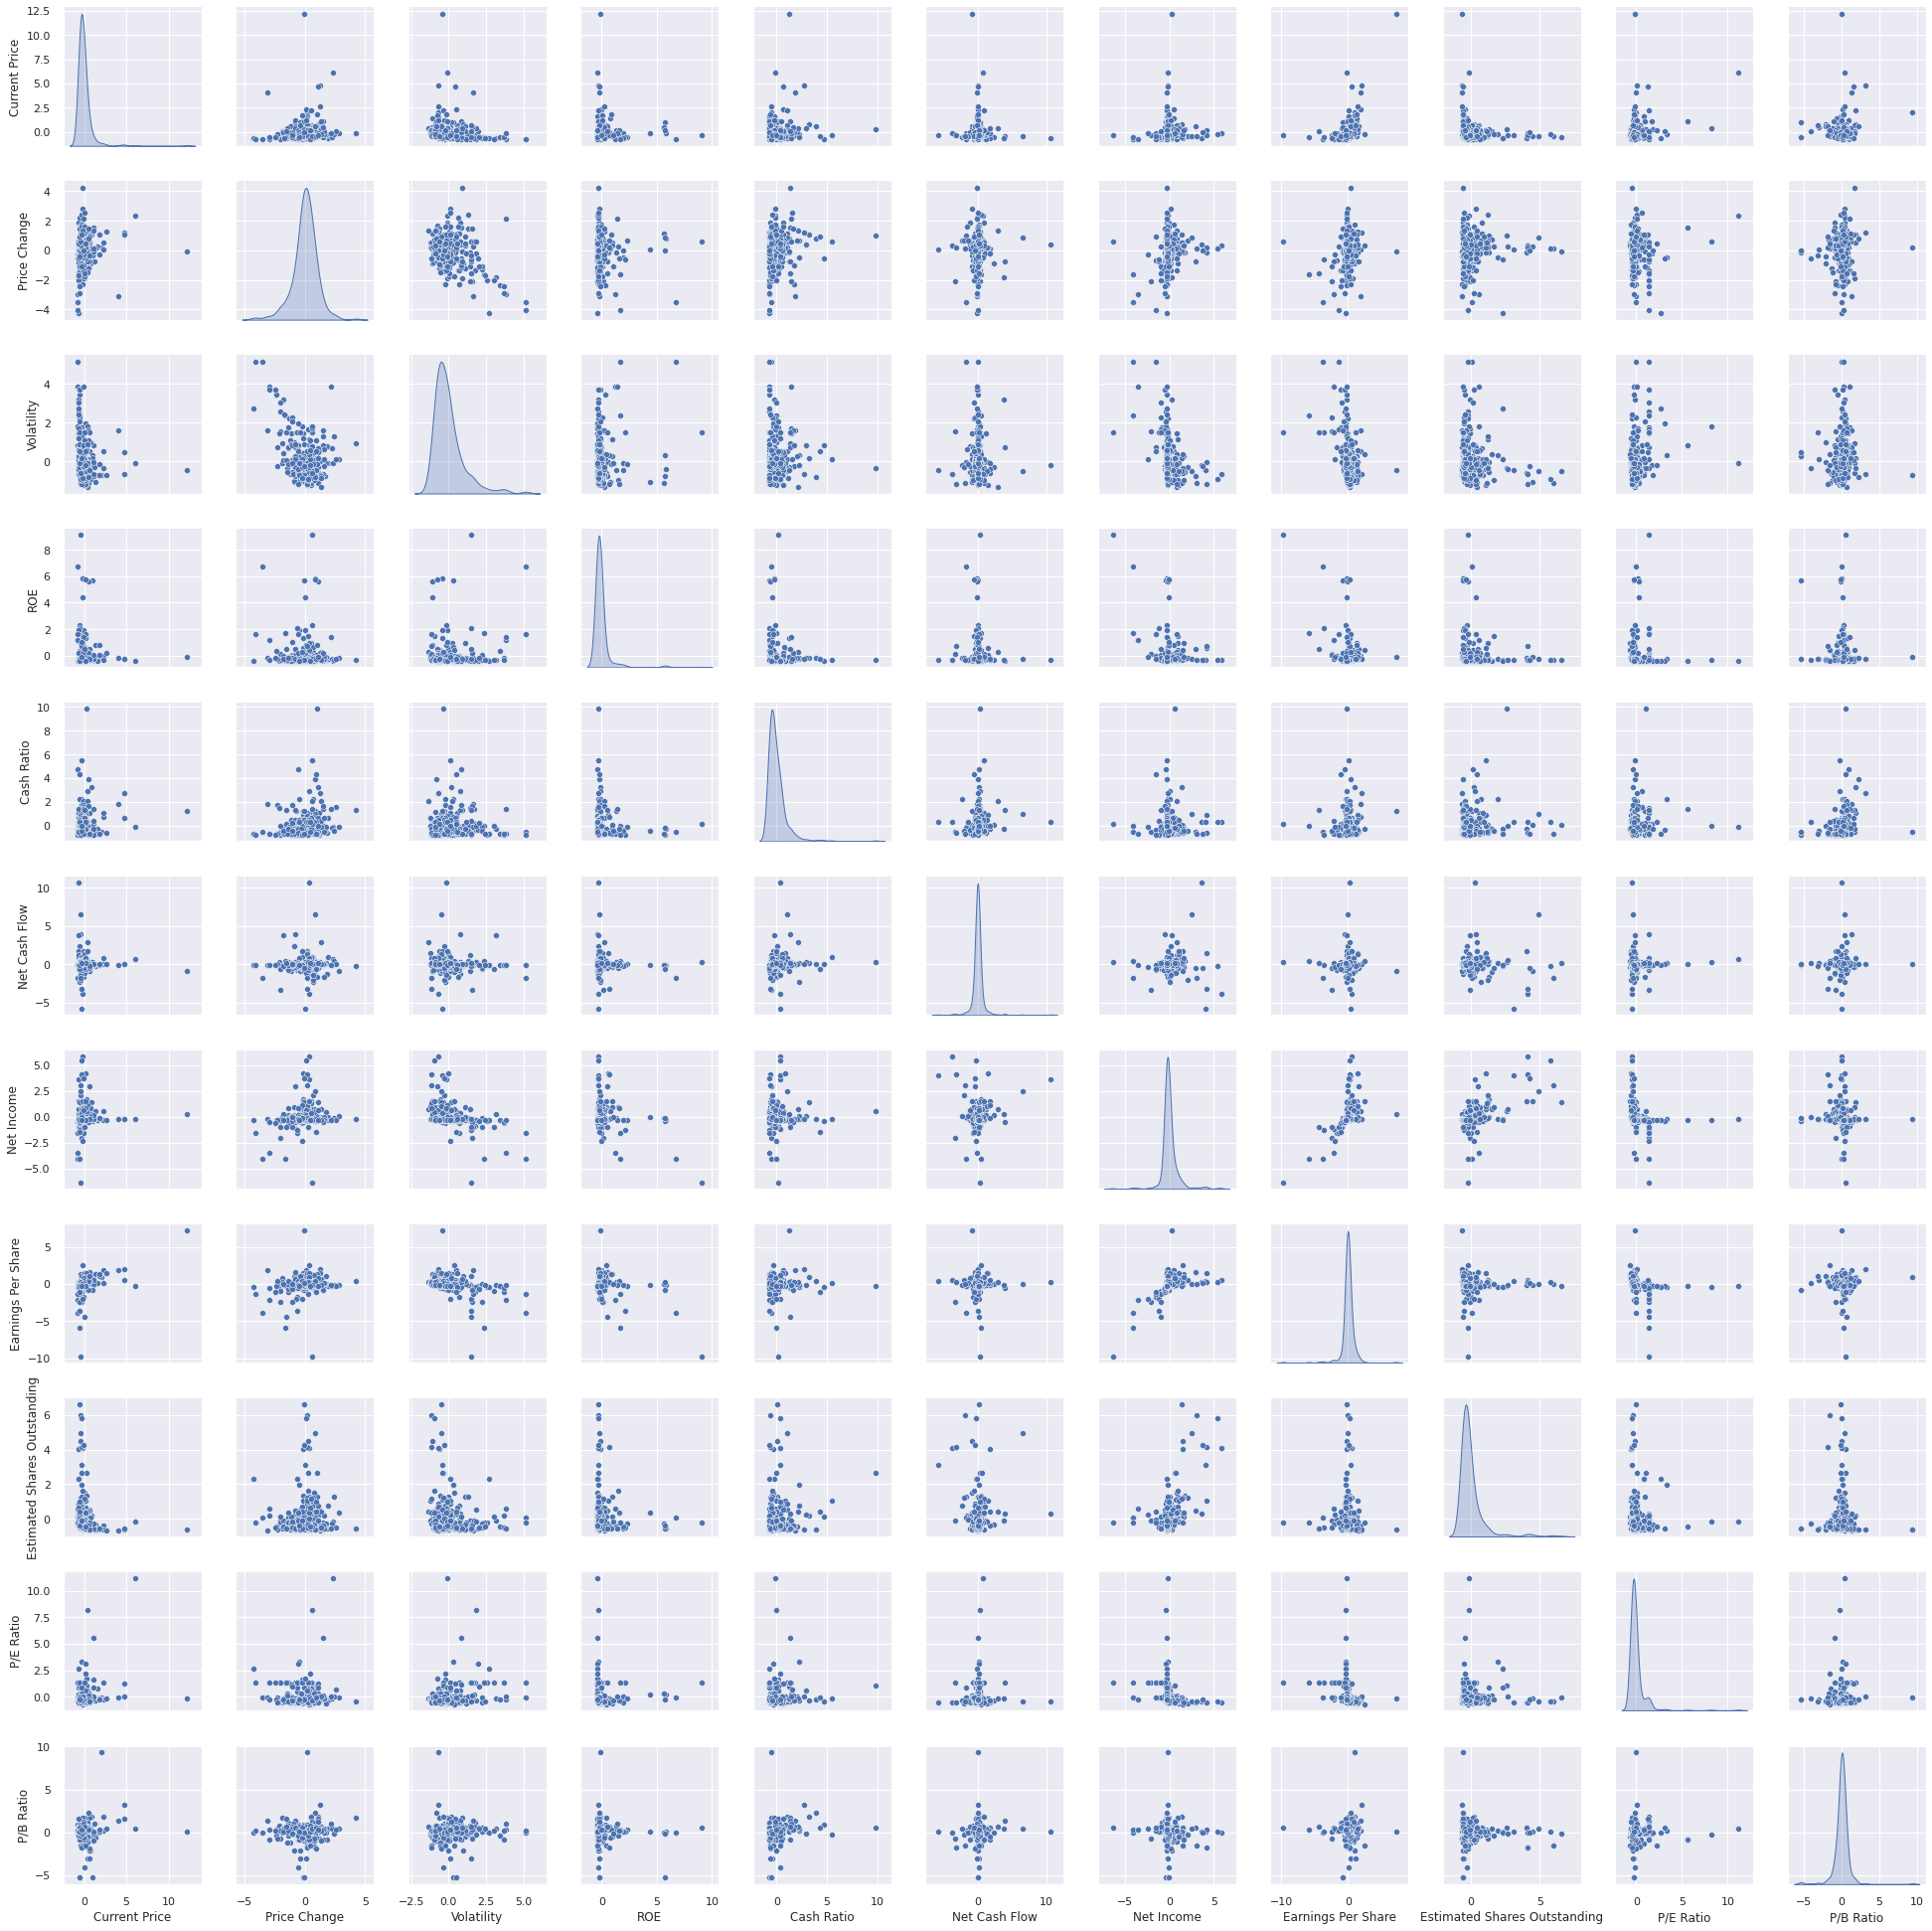

In [48]:
sns.pairplot(subset_scaled_df, diag_kind='kde')

## K-means Clustering

Grouping Data into similar clusters.

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [49]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

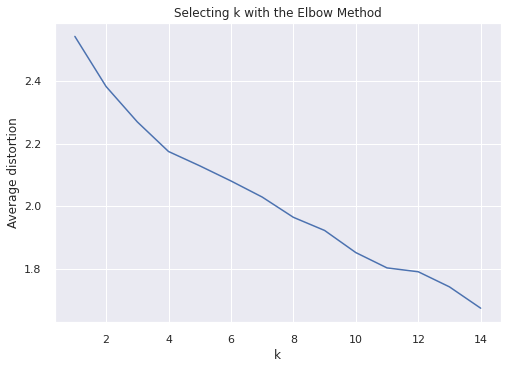

In [50]:
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state = 1)
    model.fit(k_means_df)
    prediction=model.predict(k_means_df)
    Distortions = ( 
        sum(
            np.min(cdist(k_means_df, model.cluster_centers_, 'euclidean'), axis=1)
            )
           / k_means_df.shape[0])

    meanDistortions.append(Distortions)
    print("Number of Clusters:", k, "\tAverage Distortion:", Distortions)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


- The bend is not coming out clearly as there are many bends.
 **The appropriate value of k from the elbow curve seems to be 4 or 9.**

Visualise the Elbow value with KElbowVisualiser

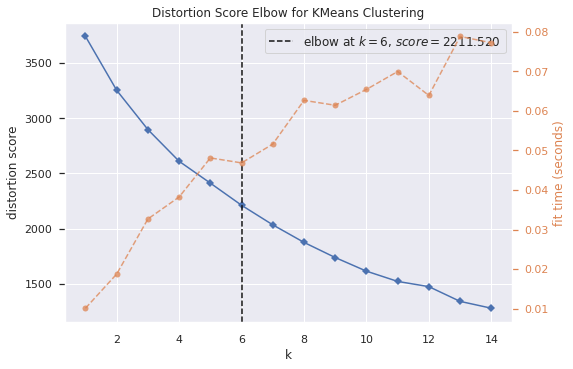

In [51]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**The appropriate value of k from the elbow visualiser is 6.**

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


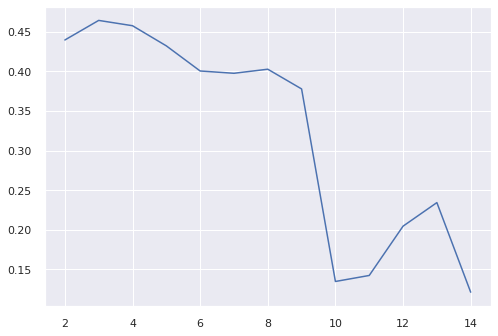

In [52]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_means_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score for 3 is higher than that for 4. So, we will choose 3 as value of k.**

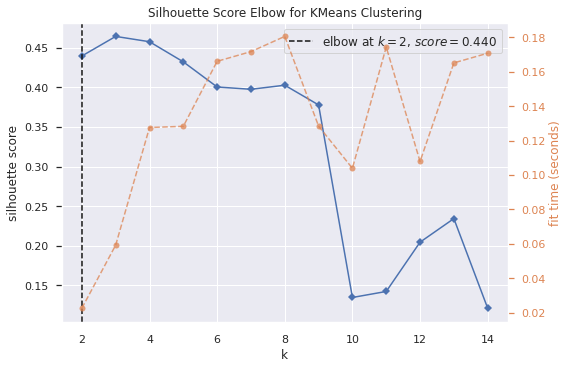

In [53]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

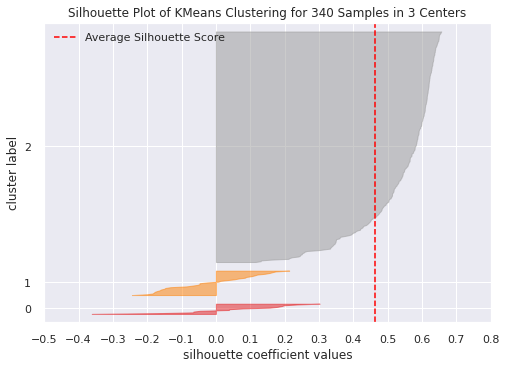

In [54]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

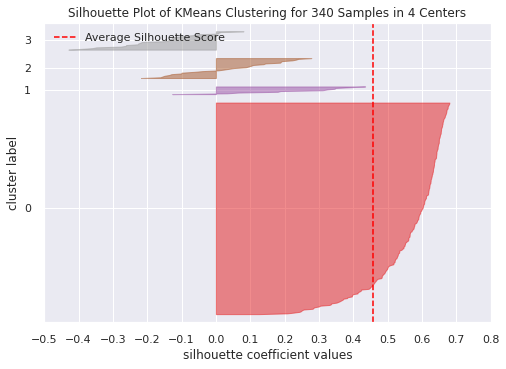

In [55]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

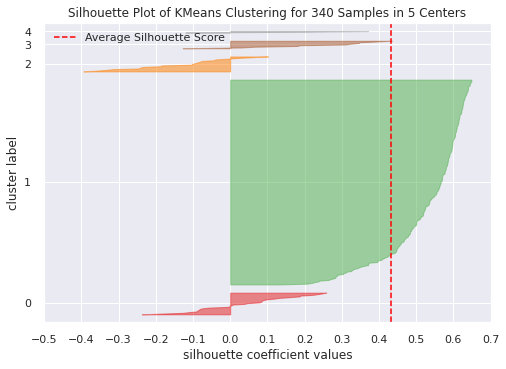

In [56]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

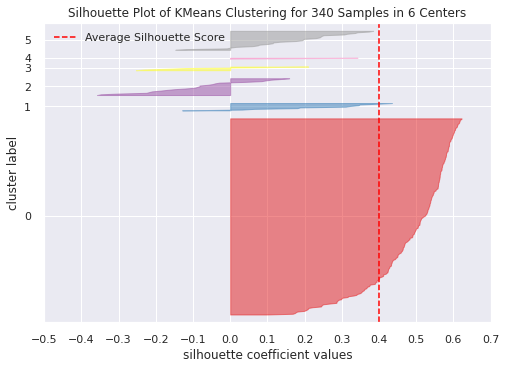

In [57]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

### Selecting final model

**The number of clusters with the best performance appears to be 4.**

In [58]:
kmeans = KMeans(n_clusters=4, random_state= 1)
kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [59]:
# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
data["K_means_segments"] = kmeans.labels_

### Cluster Profiling

In [60]:
cluster_profile = data.groupby("K_means_segments").mean()

In [61]:
#add counts for number of stocks in each cluster
cluster_profile["Count"] = (
    data.groupby("K_means_segments")["Security"].count().values
)

In [62]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Count
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [63]:
## Complete the code to print the companies in each cluster
for cl in data["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data[data["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

In [65]:
#print number of stocks within each sector for all of the clusters
for k in range(0,data['K_means_segments'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(data[data['K_means_segments']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Industrials                    52
Financials                     45
Consumer Discretionary         33
Health Care                    29
Real Estate                    26
Information Technology         24
Utilities                      24
Materials                      19
Consumer Staples               17
Energy                          6
Telecommunications Services     2
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Financials                     3
Health Care                    2
Telecommunications Services    2
Consumer Discretionary         1
Information Technology         1
Consumer Staples               1
Energy                         1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Energy                    22
Information Technology     3
Materials                  1
Industrials                1
Name: GICS Sect

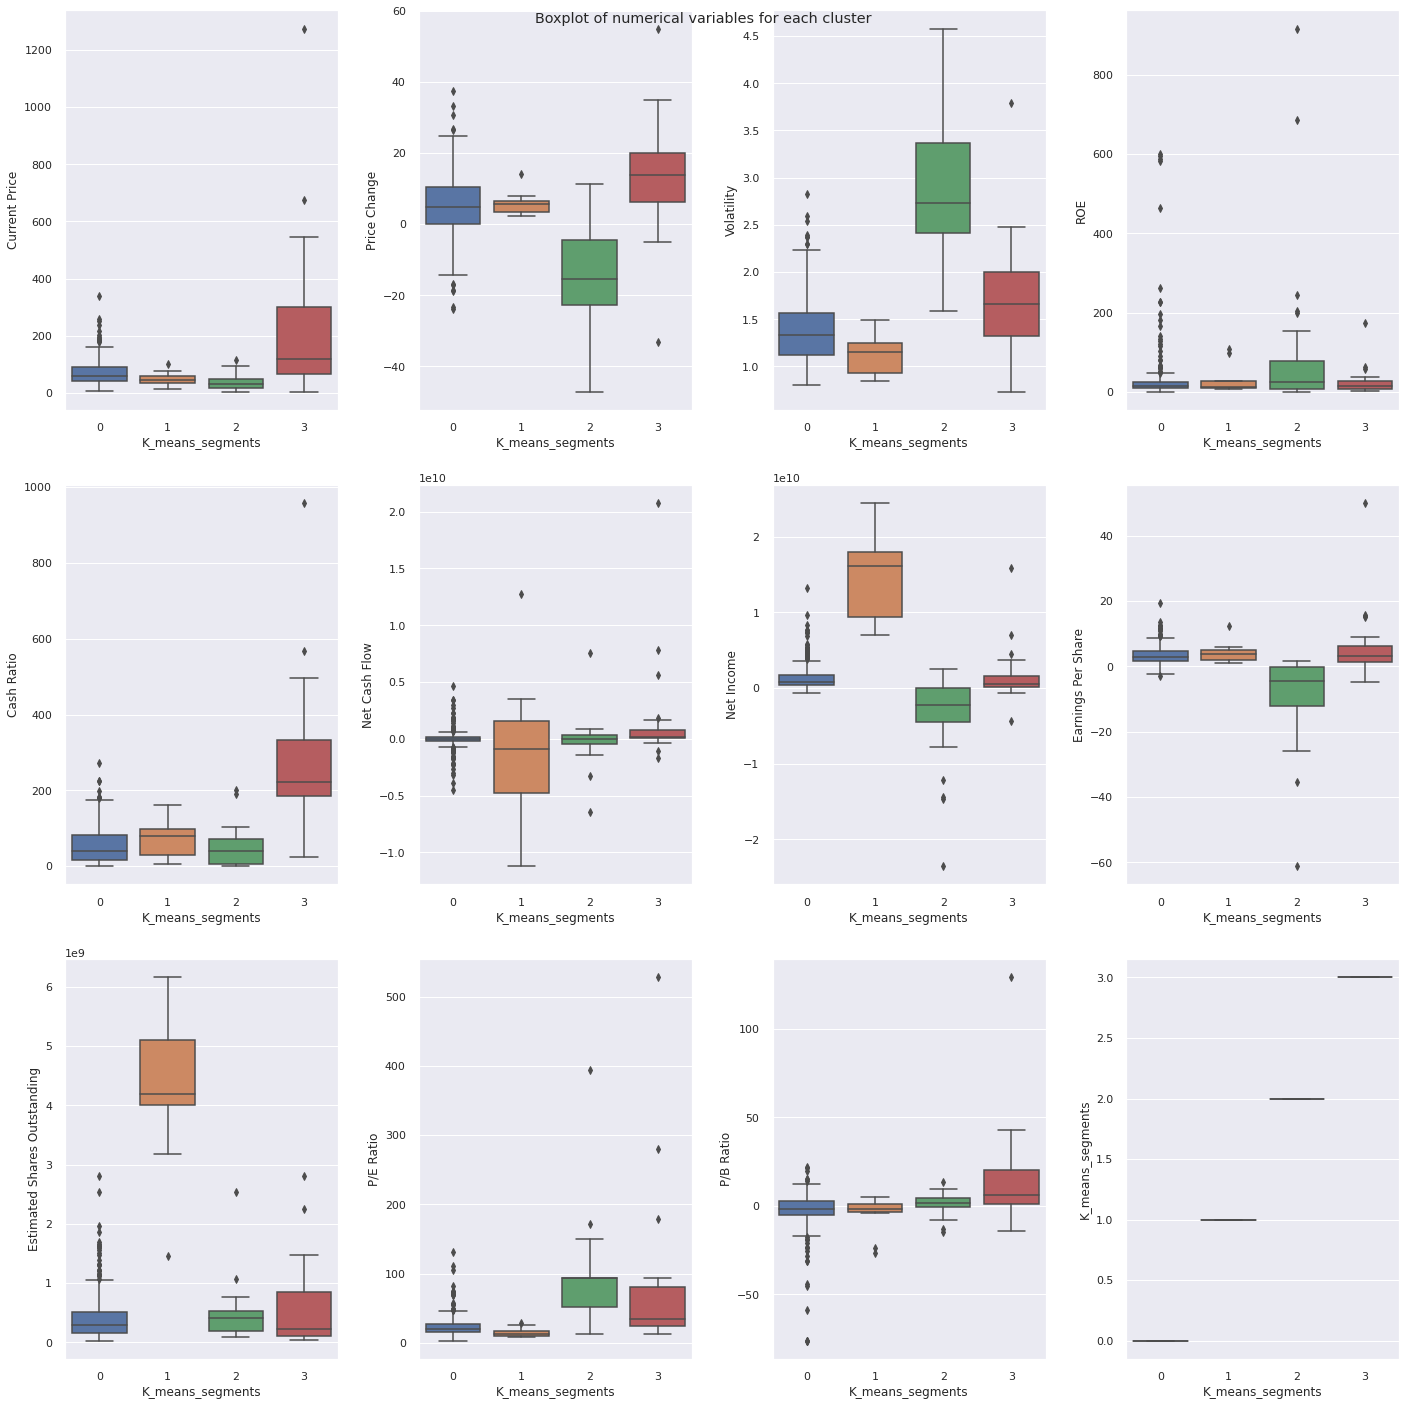

In [67]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data= data, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

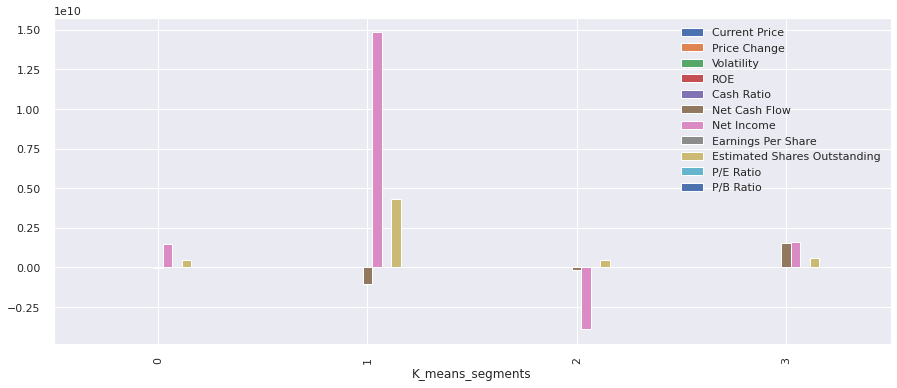

In [95]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

## Insights

**Cluster 0:-**
- There are 277 companies listed in this cluster.
- Industrials sector has maximum stocks in this cluster.
- The second highest stocks listed are from Financial sector.
- Stock price is less than 100.
- Price change is almost +/- 20% approx.
- Volatility is Low.
- Cash Ratio, P/E Ratio and lower Net Income.

**Cluster 1:**
- There are 11 companies in this cluster.
- Highest number of stocks (3) are from Financial Sector.
- The stocks of the companies in this cluster have a low price, low volatility, and have witnessed a 6% price rise on average.
- These companies have a low cash ratio and P/E ratio.
- The Net income and Number of outstanding shares is Highest.

**Cluster 2:**
- There are 27 companies in this cluster.
- Highest number of stocks (22) are from Energy Sector.
- Price change for this cluster is Negative.
- Highly Volatile.
- Very high ROE.
- Cash Ratio is low.
- P/E Ratio is highest.
- Has Negative Net Income and lowest earning per share.


**Cluster 3:**
- There are 25 companies in this cluster.
- Highest number of stocks (9) are from Health Care Sector.
- Current Price is Highest.
- Price change is highest of all clusters 13.5% price rise on average.
- Cash ratio and the Net Cash Flow is highest.
- Earnings per share and P/B Ratio is highest.



## Hierarchical Clustering

### Computing Cophenetic Correlation

In [68]:
hc_df = subset_scaled_df.copy()

In [69]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c,4)
            )
        )
        print(" ")
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232.
 
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873.
 
Cophenetic correlation for Euclidean distance and average linkage is 0.9423.
 
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8694.
 
Cophenetic correlation for Chebyshev distance and single linkage is 0.9063.
 
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5989.
 
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338.
 
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127.
 
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259.
 
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925.
 
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247.
 
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.8708.
 
Cophenetic correlation for Cityblock dist

In [70]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        round(high_cophenet_corr,4), high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9423, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [71]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [72]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and Average linkage.**

### Checking Dendograms

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

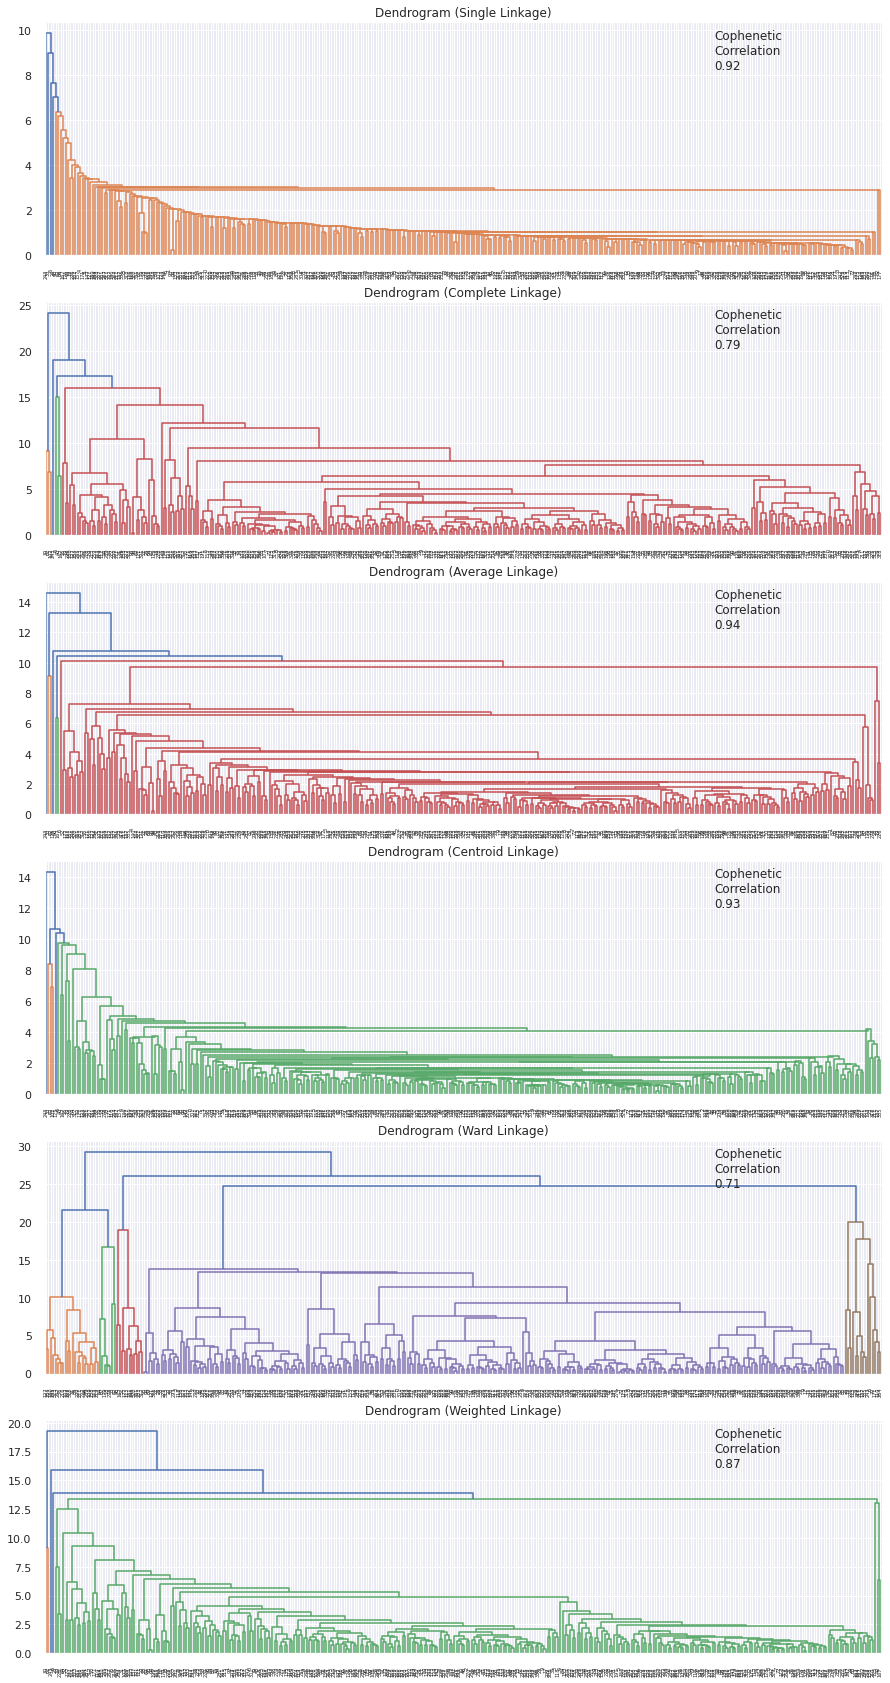

In [73]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [74]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254



- The cophenetic correlation is highest for Average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating model using sklearn

In [75]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [77]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [78]:
#group dataset by Hierarchical clusters
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [79]:
#add counts for number of stocks in each cluster
hc_cluster_profile["count_in_each_segments"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [80]:
#show dataframe with maximum values for each metric highlighted
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1


**We see that there are 3 clusters of one country, 2 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

### Creating Final Model

In [81]:
HCmodel1 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel1.fit(hc_df)

AgglomerativeClustering(n_clusters=5)

In [84]:
# creating a copy of the original data
df3 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel1.labels_
df3["HC_segments"] = HCmodel1.labels_

### Cluster Profiling

In [85]:
#group dataset by Hierarchical clusters
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [86]:
#add counts for number of stocks in each cluster
hc_cluster_profile["count_in_each_segments"] = (
    df3.groupby("HC_segments")["Security"].count().values
)

In [87]:
#show dataframe with maximum values for each metric highlighted
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_segments,,,,,,,,,,,,
0,213.518640,15.252913,1.779861,22.333333,258.740741,1504052814.814815,1716529851.851852,5.177407,689838338.441482,78.441603,13.022590,27
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


In [88]:
## Complete the code to print the companies in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 

In [89]:
#print number of stocks within each sector for all of the clusters
for k in range(0,df3['HC_segments'].nunique()):
    print('The number of stocks within each GICS Sector for Cluster '+str(k)+' are:')
    print(df3[df3['HC_segments']==k]['GICS Sector'].value_counts())
    print("   ")

The number of stocks within each GICS Sector for Cluster 0 are:
Information Technology         9
Health Care                    8
Consumer Discretionary         5
Financials                     1
Real Estate                    1
Telecommunications Services    1
Consumer Staples               1
Materials                      1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 1 are:
Energy                    2
Consumer Staples          2
Industrials               1
Consumer Discretionary    1
Financials                1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 2 are:
Financials                     3
Telecommunications Services    2
Consumer Discretionary         1
Consumer Staples               1
Health Care                    1
Energy                         1
Name: GICS Sector, dtype: int64
   
The number of stocks within each GICS Sector for Cluster 3 are:
Industrials                    52


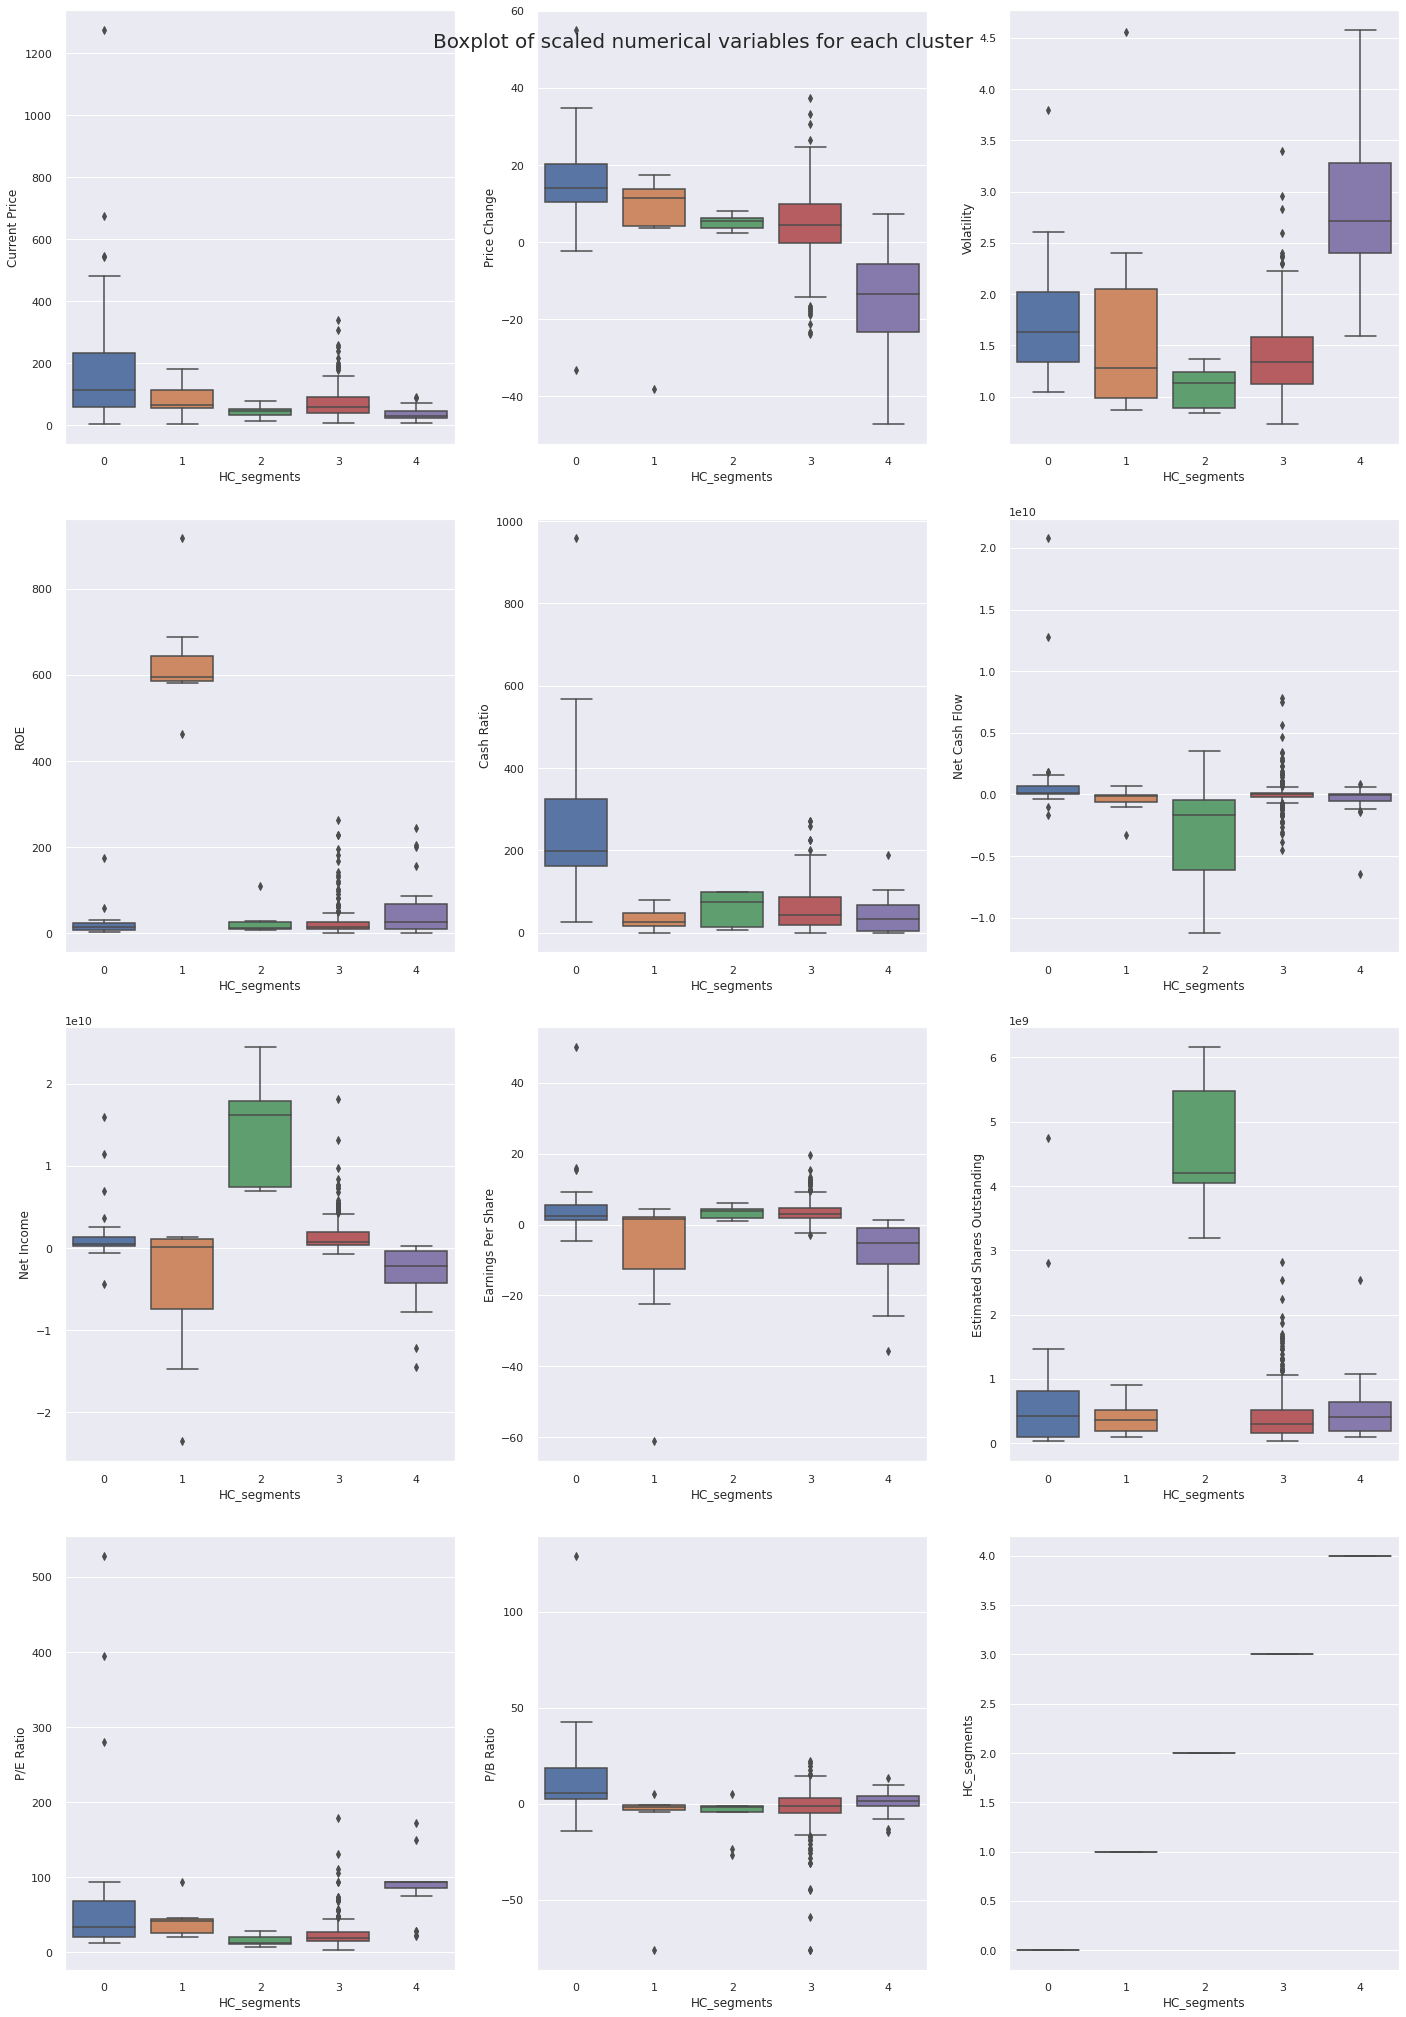

In [90]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

# selecting numerical columns
num_cols = df3.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df3, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

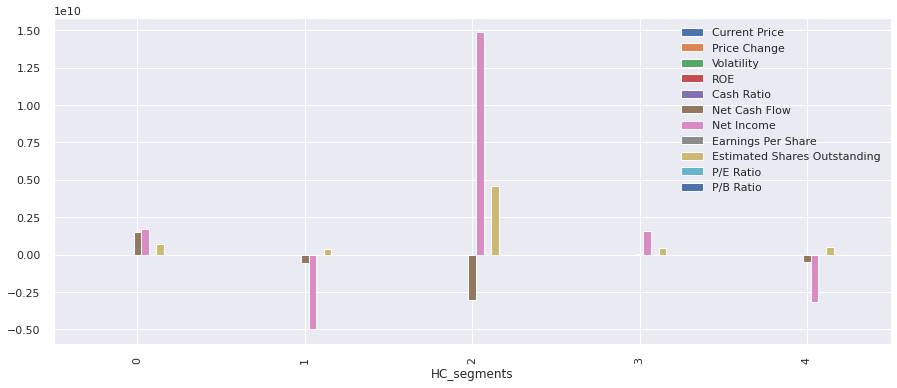

In [96]:
df3.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

### Insights

**Cluster 0:**
- 27 stocks with **Highest** Capital Price of 213 dollars.
- Price change of 15% is highest for these cluster.
- These stock are Less Volatile.
- Highest number of stocks (9) are from **Information Technology** Sector.
- Cash Ratio , Net Cash Flow ,Earning per share and P/B Ratio is **highest** for these stocks. 
- Net Income and Outstanding share are moderate.
- P/E ratio is high for this cluster.

**Cluster 1:**
- These cluster has 7 stocks with Capital Price of 84 dollars.
- Price change is lowest and the stocks are less volatile.
- ROE for these cluster is highest.
- Cash Ratio, Net Income, Earnings Per share , Net Cash FLow, Estimated outstanding shares, and P/B Ratio is **lowest** for these cluster.

**Cluster 2:**
- These cluster has 9 stocks with average Capital Price of 46 dollars.
- Price change is moderate with 5% and the stocks are less volatile.
- *Net Income* and *Shares Outstanding* are **highest** for these cluster.
- Highest number of staocks are from **Financial** sector comprising of 3 companies.
-Cash Ratio, Earnings Per share and P/E Ratio is lower for these cluster.

**Cluster 3:**
- These cluster has highest stocks of 275 companies with average priceof 72 dollars.
- Price change is moderate with 4% and the stocks are less volatile.
- The Net cash Flow of these is moderate.
- Cash ratio, Outstanding shares and Earnings per share is low.
- Highest number of stocks are from **Industrial** Sector (52), followed by **Financial**(44) and **Consumer Discretionary**(33).
- P/E Ratio for this cluster is Low.

**Cluster 4:**
- These cluster has 22 stocks with **Lowest** Capital Price of 36 dollars.
- Price change of -16% is lowest for these cluster.
- Stocks are **highly** Volatile.
- Cash Ratio and earning per share is low for these stocks.
- Highest number of stocks are from **Energy** sector comprising of 22 companies.
-P/E ratio is highest for these cluster.

## K-means vs Hierarchical Clustering

We compare several things, like:

**7.1 Which clustering technique took less time for execution?**

Both the K-means clustering technique and Hierarchical clustering technique took less than a minute to define the clusters.

**7.2 Which clustering technique gave you more distinct clusters, or are they the same?**

- Both technique gave almost similar clusters with single cluster of majority of stocks and remaining slightly similar with very few data points.

**7.3 How many observations are there in the similar clusters of both algorithms?**

- With k means where k = 4 we got clusters with stocks values as 11, 25 and 27 and 277 stocks.
- With Hierarchical where k = 5, we got clusters with stock values of 7, 9, 12,25 and 287 stocks.

**7.4 How many clusters are obtained as the appropriate number of clusters from both algorithms?**

- For K Means algorith we got 4 clusters.
- For HC Algorithm we got 5 different clusters.

For both the algorithms the clusters are very well seperated from each other.

## Actionable Insights and Recommendations

- Trade&Ahead should first identify the financial goals, risk tolerance, and investment behaviors of their clients, then recommend a cluster as a potential portfolio of stocks which will fit these needs.
- Trade&Ahead could use these clusters as an starting point for further financial statement analysis, particularly which individual stocks do not fit the "profile" of the cluster
- Assuming selecting individual stocks is a component of a client's investment strategy, Trade&Ahead may then be able to identify stocks which should outperform or likely to fall.
- They should also conduct cluster analysis separately for each of the economic sectors as it will help them to provide better investment recommendations to their clients.